###Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

###Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


####Meaning:
<p>SPX: index S&P500 compund of the 500 most negotiate companies in the NYSE's stock market</p>
<p>GLD: ticket of NYSE's stock market to negotiate SPDR Gold Shares, a fund that invests in gold</p>
<p>USO: United States Oil, it's the stock quote of petroleum in NYSE's stock market</p>
<p>SLV: ticket of NYSE's stock market to negotiate iShares Silver Trust, a fund that invests in silver</p>
<p>EUR/USD: exhange market that shows the value of Europe currency in USA currency</p>

In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


###Pre-processing

In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


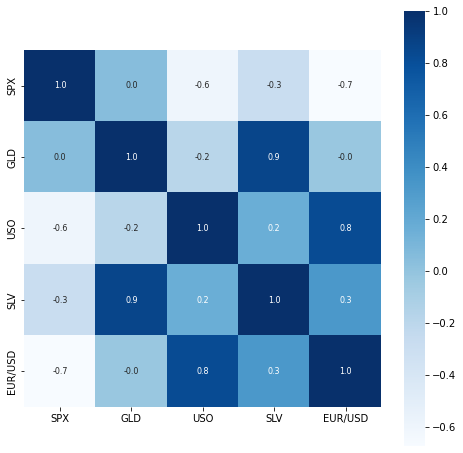

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            annot_kws={'size':8},
            cmap='Blues'
            )

In [13]:
print(df.corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


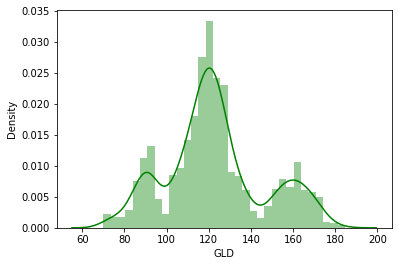

In [14]:
# distribution of the GLD price
sns.distplot(df['GLD'],
             color='green'
             )

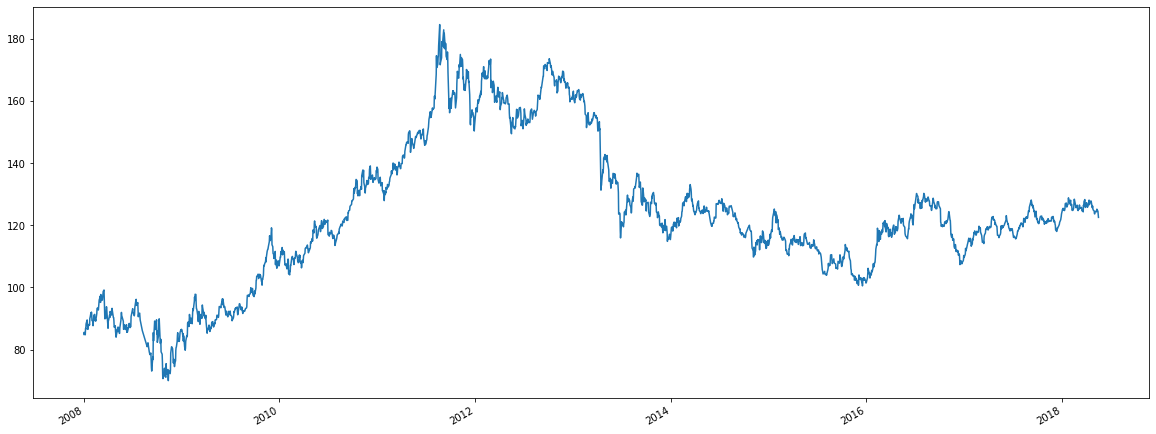

In [15]:
# price evolution of Gold
#sns.set_theme(style='whitegrid')
#sns.lineplot(data=df.rolling(30).mean(),
#             palette='tab10',
#             linewidth=2.5)
plt.figure(figsize=(20,8))
plt.plot(df['Date'], df['GLD'])
plt.title('Price Evolution GLD')
plt.xlabel('Date')
plt.ylabel('Price USD$')
plt.gcf().autofmt_xdate()
plt.show()

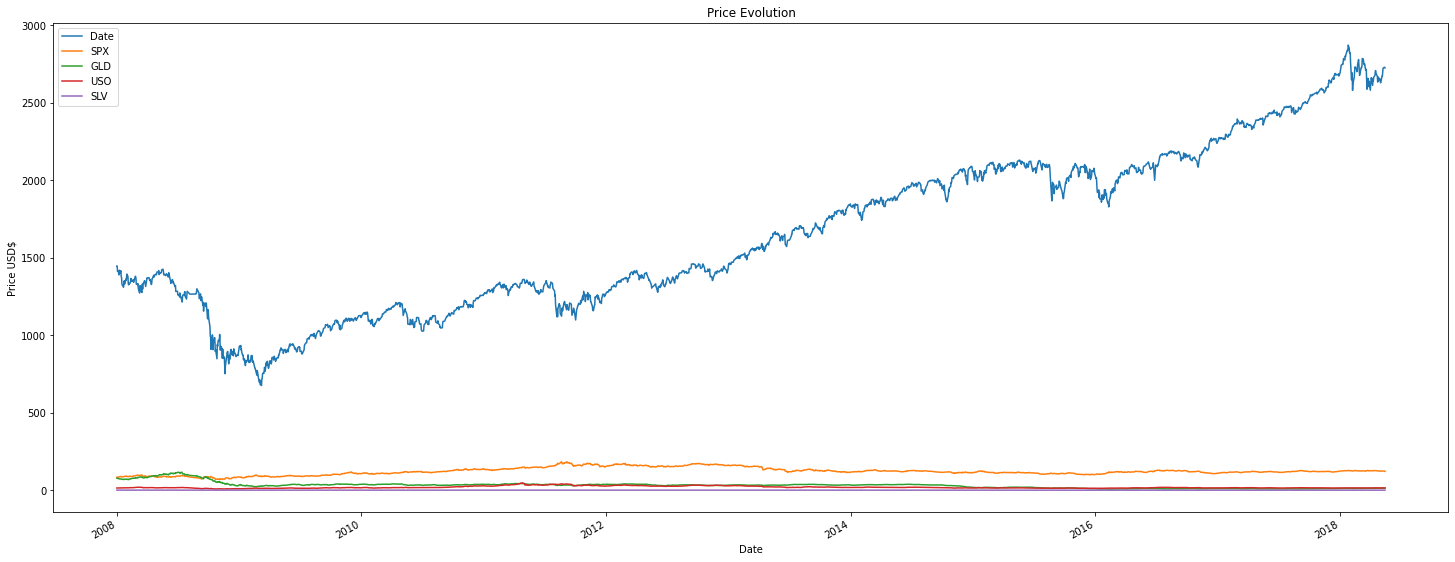

In [21]:
# price evolution of all the dataset
plt.figure(figsize=(25,10))
plt.plot(df['Date'], df[['SPX','GLD','USO','SLV','EUR/USD']])
plt.title('Price Evolution')
plt.xlabel('Date')
plt.ylabel('Price USD$')
plt.legend(labels=df)
plt.gcf().autofmt_xdate()
plt.show()

In [24]:
# to improve the visualization of the behavior of all the data and find patterns, SPX data must be divided by 10, allowing us to see
# it's behavior and the behavior of the others times series of this dataset
df['SPX/10'] = [x/10 for x in df['SPX']]

In [25]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,SPX/10
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,144.716003
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,144.716003
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,141.163001
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,141.618005
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,139.018994


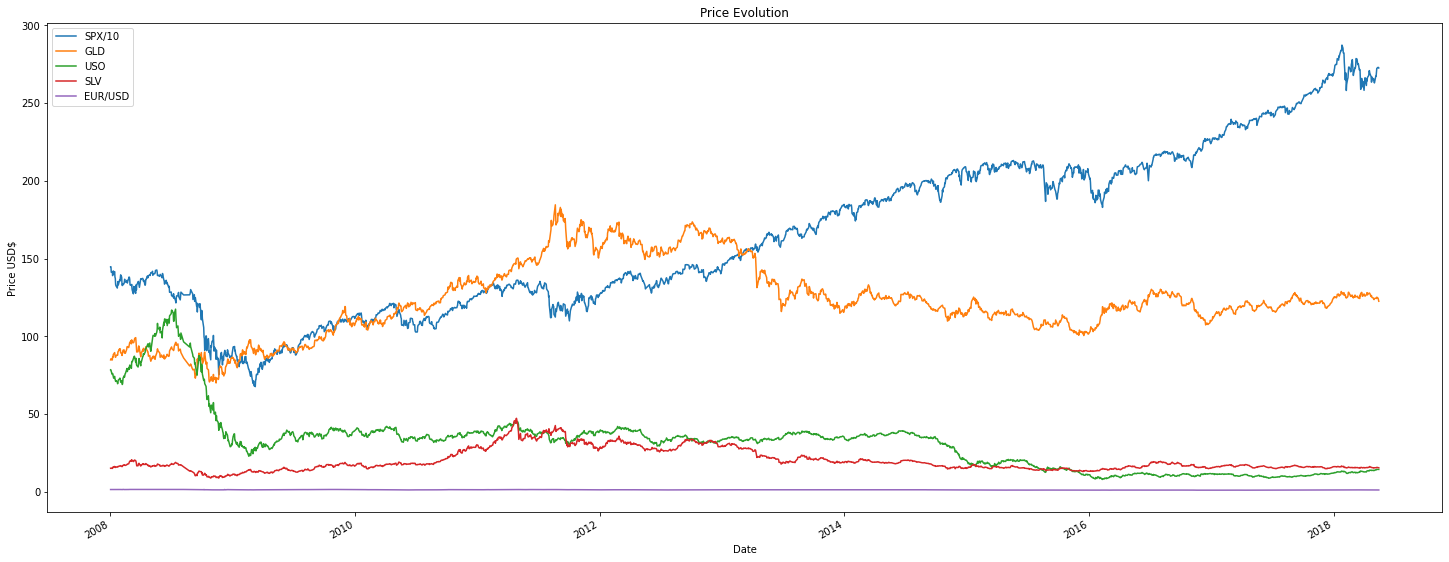

In [28]:
plt.figure(figsize=(25,10))
plt.plot(df['Date'], df[['SPX/10','GLD','USO','SLV','EUR/USD']])
plt.title('Price Evolution')
plt.xlabel('Date')
plt.ylabel('Price USD$')
plt.legend(labels=df[['SPX/10','GLD','USO','SLV','EUR/USD']])
plt.gcf().autofmt_xdate()
plt.show()

In [29]:
df.drop(labels='SPX/10', axis=1, inplace=True)

In [30]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


#### Splitting the data

In [32]:
x = df.drop(['Date','GLD'], axis=1)
y = df['GLD']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Trainning the models

#### Random Forest Regressor

In [34]:
rf_regressor_model = RandomForestRegressor(n_estimators=100)

In [35]:
rf_regressor_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Evaluating the models

#### R² error

In [37]:
rf_regressor_pred = rf_regressor_model.predict(x_test)

# R squared error
rf_regressor_r2_score = metrics.r2_score(y_test, rf_regressor_pred)
print('R Squared error: {}'.format(rf_regressor_r2_score))

R Squared error: 0.9904360458656088


####Plotting the actual and the predicted values

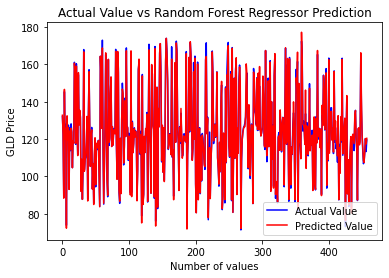

In [40]:
plt.plot(list(y_test), color='blue', label='Actual Value')
plt.plot(rf_regressor_pred, color='red', label='Predicted Value')
plt.title('Actual Value vs Random Forest Regressor Prediction')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

###Acknowledgements
<p>Dataset Gold Price Data from Kaggle: https://www.kaggle.com/altruistdelhite04/gold-price-data</p>
<p>Project 8 Gold Price Prediction: https://www.youtube.com/watch?v=9ffkBvh8PTQ</p>
